In [109]:
import matplotlib.pyplot as plt

In [103]:
def raw_data_processing(file_path):
    doc=[]
    temp={}
    with open(file_path) as f:
        for line in f:
            content=line.rstrip().split('\t')
            if len(content)==1:
                doc.append(temp)
                temp={}
            else:
                if len(content[0].split(' '))==2:
                    if not content[0]+'_0' in temp:
                        temp[content[0]+'_0']=float(content[1])
                    else:
                        if content[0]+'_1' in temp:
                            temp[content[0]+'_2']=float(content[1])
                        else:
                            temp[content[0]+'_1']=float(content[1])
                else:
                    temp[content[0]]=float(content[1])
    return doc

def pickup(proc_bw_content_0,proc_bw_content_1,proc_bw_content_2,content):
    for i in content:
        proc_bw_content_0.append(i['real_bw_0'])
        proc_bw_content_1.append(i['real_bw_1'])
        proc_bw_content_2.append(i['real_bw_2'])
        
def smooth(proc_bw_content_0):
    for i in range(len(proc_bw_content_0)):
        if proc_bw_content_0[i] < 0.001:
            proc_bw_content_0[i]=0
        if proc_bw_content_0[i] > 100:
            proc_bw_content_0[i]=proc_bw_content_0[i-1]

def mysum(content_0,content_1,content_2,content_sum):
    for i in range(len(content_0)):
        content_sum.append(content_0[i]+content_1[i]+content_2[i])

In [104]:
file_path="C:\\Users\\ycy\\Desktop\\SS_Abstract.dat"
content=raw_data_processing(file_path)

In [105]:
content

[{'Standard_NC_YCY_v1.0': 1208093006.0,
  'set bw_0': 70.0,
  'set loss_0': 0.0001,
  'set delay_0': 30.0,
  'set bw_1': 20.0,
  'set loss_1': 0.0007,
  'set delay_1': 20.0,
  'set bw_2': 100.0,
  'set loss_2': 0.0008,
  'set delay_2': 40.0,
  'real_bw_0': 3.62557,
  'real_loss_0': 0.0,
  'real_delay_0': 30.0,
  'real_tx_packets_0': 7409.0,
  'real_rx_packets_0': 7408.0,
  'real_bw_1': 0.707889,
  'real_loss_1': 0.0,
  'real_delay_1': 22.0,
  'real_tx_packets_1': 1250.0,
  'real_rx_packets_1': 1250.0,
  'real_bw_2': 5.25114,
  'real_loss_2': 0.0,
  'real_delay_2': 40.0,
  'real_tx_packets_2': 1554.0,
  'real_rx_packets_2': 1553.0},
 {'Standard_NC_YCY_v1.0': 1208093017.0,
  'set bw_0': 20.0,
  'set loss_0': 0.001,
  'set delay_0': 15.0,
  'set bw_1': 1.0,
  'set loss_1': 0.005,
  'set delay_1': 25.0,
  'set bw_2': 10.0,
  'set loss_2': 0.0001,
  'set delay_2': 40.0,
  'real_bw_0': 2.60022,
  'real_loss_0': 0.0,
  'real_delay_0': 17.0,
  'real_tx_packets_0': 4846.0,
  'real_rx_packets_0'

In [106]:
proc_bw_content_0=[]
proc_bw_content_1=[]
proc_bw_content_2=[]
proc_bw_content_sum=[]

In [108]:
pickup(proc_bw_content_0,proc_bw_content_1,proc_bw_content_2,content)
smooth(proc_bw_content_0)
smooth(proc_bw_content_1)
smooth(proc_bw_content_2)
mysum(proc_bw_content_0,proc_bw_content_1,proc_bw_content_2,proc_bw_content_sum)

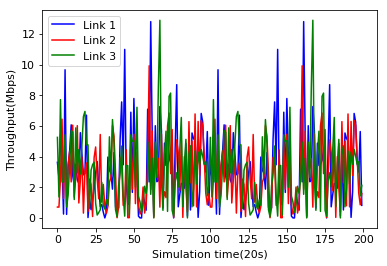

In [111]:
plt.plot(proc_bw_content_0,'b',label="Link 1")
plt.plot(proc_bw_content_1,'r',label="Link 2",)
plt.plot(proc_bw_content_2,'g',label="Link 3")
#plt.plot(proc_bw_content_sum,linestyle='-',color='mediumvioletred',label="Total",linewidth=2)
plt.xlabel("Simulation time(20s)",fontsize=11)
plt.ylabel("Throughput(Mbps)",fontsize=11)
plt.legend(fontsize=11)
#plt.legend(bbox_to_anchor=(1.05,0.75),loc=3,borderaxespad=0)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()